In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import re

In [12]:
def load_data():
    
    data_dir = Path("../results")
    
    files = data_dir.glob("*.csv")
    
    regex = re.compile("results_maxDelay=(\d\.\d)s.csv")
    
    dfs = []
    
    for f in files:
        
        f_match = regex.match(f.name)
        
        if f_match:
            
            tmp = pd.read_csv(f)
            tmp.columns = ["N_requests", "N_semaphores", "Duration"]
            tmp["Delay"] = float(f_match.groups()[0])
            
            dfs.append(tmp)
            
    df = pd.concat(dfs, axis=0)
    df["Duration_per_request"] = df["Duration"] / df["N_requests"]
    df["Requests_per_min"] = 60 / df["Duration_per_request"]
    
    return df

In [13]:
df  = load_data()

In [14]:
df.head()

N_requests  N_semaphores  Duration  Delay  Duration_per_request  \
0        1000          1000  2.283757    1.0              0.002284   
1        1000          2000  1.352880    1.0              0.001353   
2        1000          4000  1.323480    1.0              0.001323   
3        1000          6000  1.323900    1.0              0.001324   
4        1000          8000  1.359654    1.0              0.001360   

   Requests_per_min  
0      26272.500919  
1      44349.822029  
2      45335.034131  
3      45320.659677  
4      44128.875976

# How does the duration change with number of requests for each requestion duration?

In [15]:
pivot_df = df.groupby("Delay").apply(lambda x: pd.pivot_table(x, values="Duration", index="N_requests", columns="N_semaphores"))

/tmp/ipykernel_44008/532994816.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_df = df.groupby("Delay").apply(lambda x: pd.pivot_table(x, values="Duration", index="N_requests", columns="N_semaphores"))


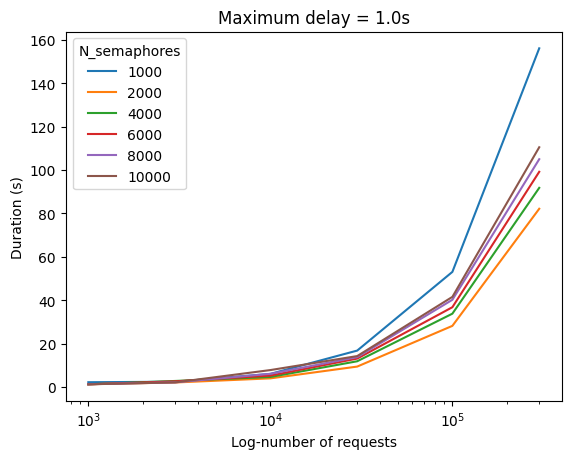

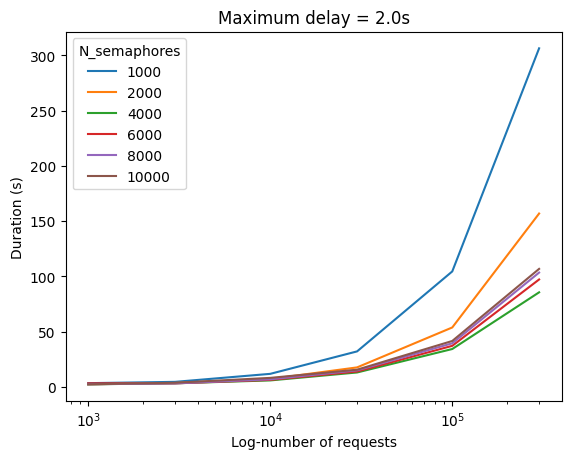

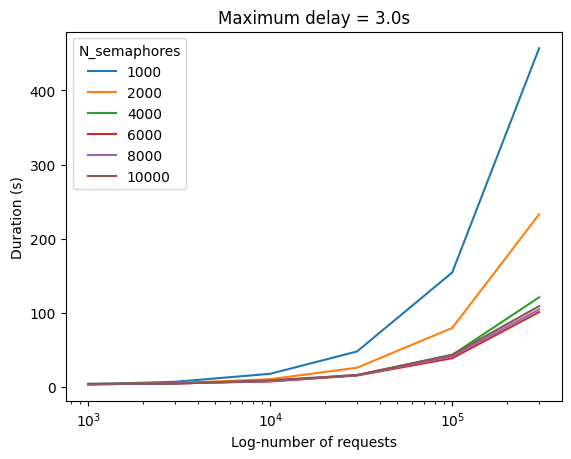

In [16]:
for i, g in pivot_df.groupby("Delay"):
    
    g.droplevel(0).plot(title=f"Maximum delay = {i}s")
    plt.gca().set_xscale("log")
    plt.gca().set_xlabel("Log-number of requests")
    plt.gca().set_ylabel("Duration (s)")
    

# How does the duration change for each semaphore count?

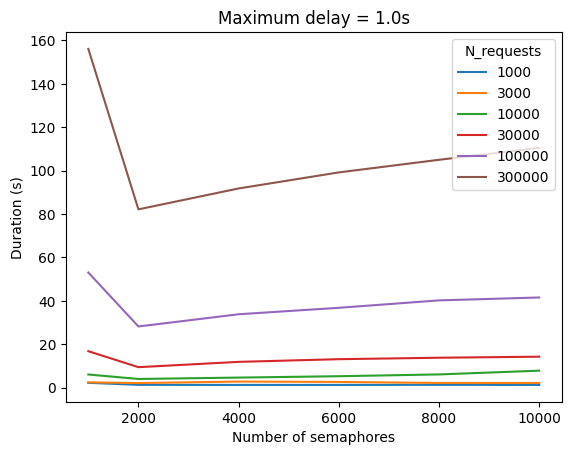

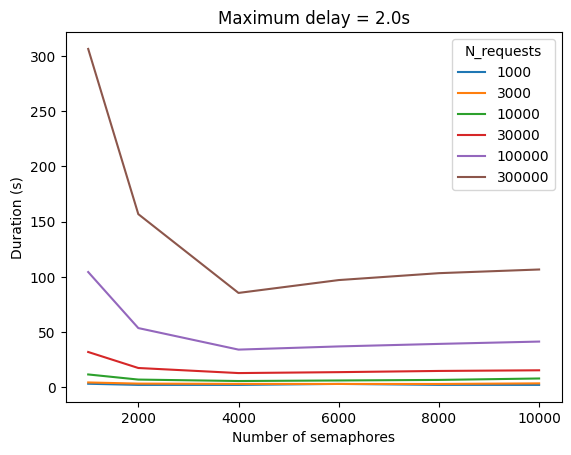

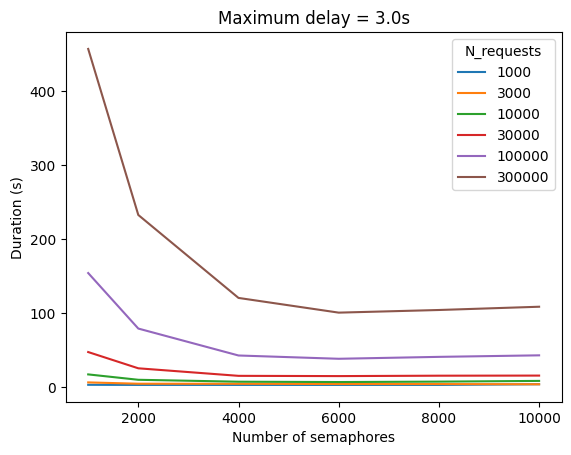

In [17]:
for i, g in pivot_df.groupby("Delay"):
    
    g.droplevel(0).T.plot(title=f"Maximum delay = {i}s")
    plt.gca().set_xlabel("Number of semaphores")
    plt.gca().set_ylabel("Duration (s)")

# What if I saw things as requests/min?

In [18]:
pivot_df = df.groupby("Delay").apply(lambda x: pd.pivot_table(x, values="Requests_per_min", index="N_requests", columns="N_semaphores"))

/tmp/ipykernel_44008/1119201475.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_df = df.groupby("Delay").apply(lambda x: pd.pivot_table(x, values="Requests_per_min", index="N_requests", columns="N_semaphores"))


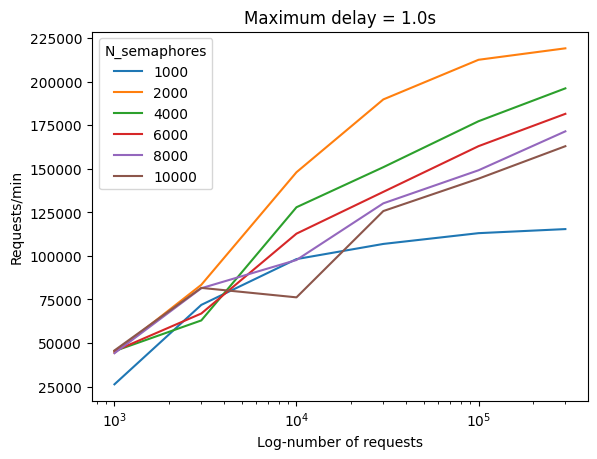

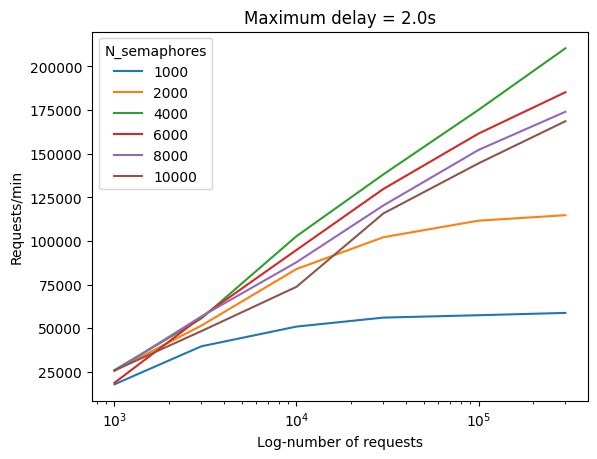

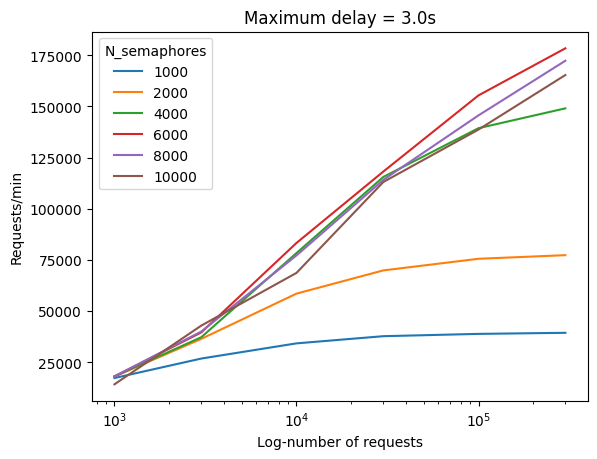

In [19]:
for i, g in pivot_df.groupby("Delay"):
    
    g.droplevel(0).plot(title=f"Maximum delay = {i}s")
    plt.gca().set_xscale("log")
    plt.gca().set_xlabel("Log-number of requests")
    plt.gca().set_ylabel("Requests/min")

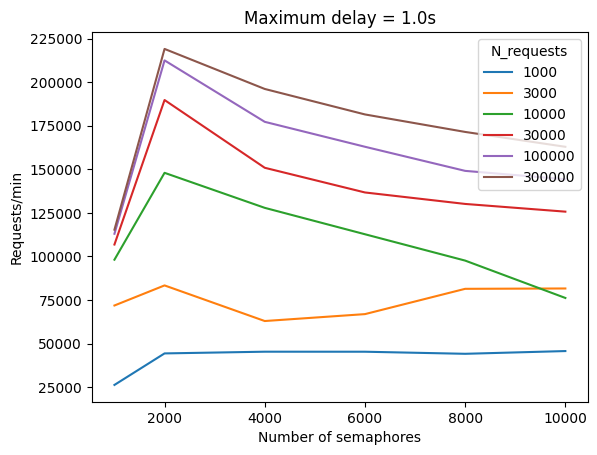

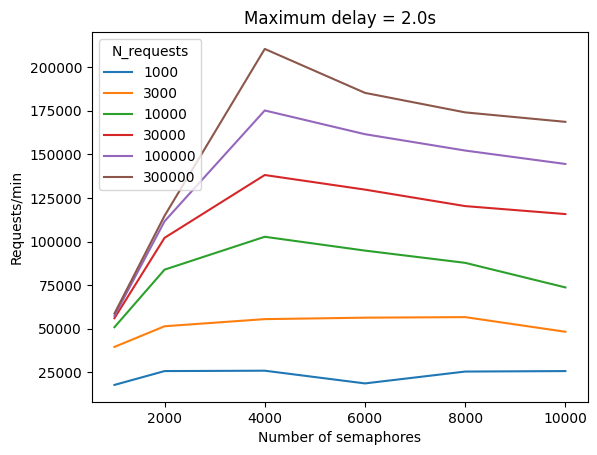

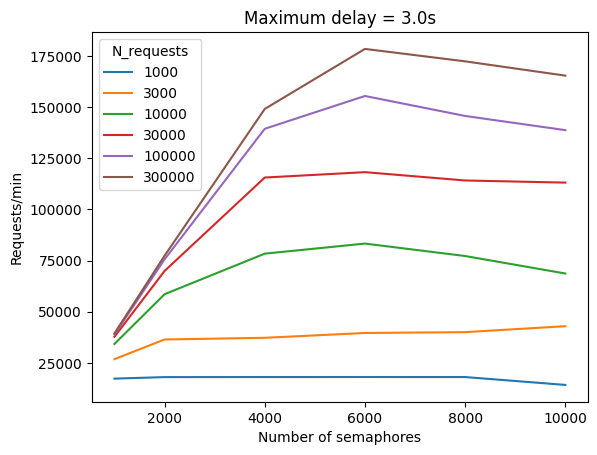

In [20]:
for i, g in pivot_df.groupby("Delay"):
    
    g.droplevel(0).T.plot(title=f"Maximum delay = {i}s")
    plt.gca().set_xlabel("Number of semaphores")
    plt.gca().set_ylabel("Requests/min")

In [21]:
final_results = pd.read_csv("../results/results.csv")
final_results.columns = ["N_requests", "N_semaphores", "Duration"]
final_results["Duration_mins"] = (final_results["Duration"] / 60)
final_results["Requests_per_min"] = final_results["N_requests"] / final_results["Duration_mins"]

In [22]:
final_results

N_requests  N_semaphores     Duration  Duration_mins  Requests_per_min
0     1000000          5000   291.814159       4.863569     205610.310763
1    10000000          5000  2818.995883      46.983265     212841.743957